In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
## 분류 싱글
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)



In [114]:
df=pd.read_excel('../csv-data/쇼핑몰프로젝트DATA.xlsx')
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
0,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,A.2O대,291,98.7,10.9,18.6,22.8,47.7,3.3
1,2020,생활/취미/사무용품/인테리어/골프용품,평일,월,D.14-18시,M,C.4O대,6225,66.7,28.3,17.9,21.0,32.8,2.9
2,2019,생활/취미/사무용품/인테리어/골프용품,휴일,일,F.22-02시,M,B.3O대,51,86.3,14.6,21.3,22.4,41.7,2.9
3,2021,패션/화장품,휴일,일,D.14-18시,F,C.4O대,3564,89.8,9.3,14.9,17.6,58.2,5.3
4,2020,생활/취미/사무용품/인테리어/골프용품,평일,월,C.10-14시,F,D.5O대,1101,46.3,28.2,14.1,20.2,37.4,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,2019,패션/화장품,평일,월,F.22-02시,M,C.4O대,2470,66.8,17.1,23.2,20.0,39.7,2.9
19993,2020,생활/취미/사무용품/인테리어/골프용품,평일,금,D.14-18시,F,C.4O대,107,76.8,24.1,12.9,17.6,45.4,3.8
19994,2021,패션/화장품,평일,화,E.18-22시,M,B.3O대,603,91.5,10.6,15.6,18.5,55.3,4.9
19995,2021,생활/취미/사무용품/인테리어/골프용품,평일,화,C.10-14시,F,E.60대이상,415,31.7,11.0,18.7,19.6,50.7,4.1


### ***EDA***

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 14 columns):
CRI_YM                   19997 non-null int64
TAG                      19997 non-null object
평일휴일                     19997 non-null object
요일                       19997 non-null object
시간대                      19997 non-null object
성별                       19997 non-null object
연령대                      19997 non-null object
건수합계                     19997 non-null int64
인터넷 쇼핑 이용자 비율 (%)        19997 non-null float64
월 평균 구매빈도-1회 미만 (%)      19997 non-null float64
월 평균 구매빈도-1~2회 미만 (%)    19997 non-null float64
월 평균 구매빈도-2~3회 미만 (%)    19997 non-null float64
월 평균 구매빈도-3회 이상 (%)      19997 non-null float64
월 평균 구매빈도-평균 (회)         19997 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 2.1+ MB


In [116]:
y=df.groupby(['CRI_YM']).sum()
y
#코로나이후로 급격하게 증가함.

,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
CRI_YM,,,,,,,
2019,4159520,437270.1,118355.4,146484.7,128356.7,292004.1,20633.6
2020,6117979,453209.2,180173.6,112880.9,137462.4,262246.2,22393.6
2021,7191191,456200.3,73303.7,105298.2,114076.5,328784.1,30148.0


In [122]:
y_df=df.groupby(['CRI_YM','TAG'])['건수합계'].sum()   
y_df

CRI_YM  TAG                 
2019    생활/취미/사무용품/인테리어/골프용품    1801374
        식료품                      642621
        애완용품                      62621
        패션/화장품                  1652904
2020    생활/취미/사무용품/인테리어/골프용품    2712752
        식료품                     1064161
        애완용품                      98877
        패션/화장품                  2242189
2021    생활/취미/사무용품/인테리어/골프용품    3155827
        식료품                     1441522
        애완용품                     119223
        패션/화장품                  2474619
Name: 건수합계, dtype: int64

In [125]:
df.groupby(['요일','시간대'])['건수합계'].sum()   

요일  시간대     
금   A.02-06시     74381
    B.06-10시    305270
    C.10-14시    617480
    D.14-18시    543220
    E.18-22시    426898
    F.22-02시    377791
목   A.02-06시     76512
    B.06-10시    318767
    C.10-14시    702970
    D.14-18시    586421
    E.18-22시    491145
    F.22-02시    447159
수   A.02-06시     78151
    B.06-10시    304175
    C.10-14시    638406
    D.14-18시    593970
    E.18-22시    534510
    F.22-02시    490460
월   A.02-06시     85081
    B.06-10시    336012
    C.10-14시    759418
    D.14-18시    659628
    E.18-22시    592693
    F.22-02시    530925
일   A.02-06시     72236
    B.06-10시    191171
    C.10-14시    448975
    D.14-18시    525959
    E.18-22시    634053
    F.22-02시    528111
토   A.02-06시     65758
    B.06-10시    210193
    C.10-14시    440476
    D.14-18시    446445
    E.18-22시    438186
    F.22-02시    369551
화   A.02-06시     73467
    B.06-10시    293114
    C.10-14시    627813
    D.14-18시    562891
    E.18-22시    503616
    F.22-02시    465232
Name: 건수합계, dtype: in

In [126]:
df.groupby(['TAG','연령대'])['건수합계'].sum()   

TAG                   연령대    
생활/취미/사무용품/인테리어/골프용품  A.2O대       799276
                      B.3O대      2684681
                      C.4O대      2693499
                      D.5O대      1114400
                      E.60대이상     378097
식료품                   A.2O대       314240
                      B.3O대      1036624
                      C.4O대      1103588
                      D.5O대       518929
                      E.60대이상     174923
애완용품                  A.2O대        52338
                      B.3O대        93976
                      C.4O대        84478
                      D.5O대        39832
                      E.60대이상      10097
패션/화장품                A.2O대      1139793
                      B.3O대      2274843
                      C.4O대      2003614
                      D.5O대       755202
                      E.60대이상     196260
Name: 건수합계, dtype: int64

In [128]:
df.groupby(['연령대'])['건수합계'].sum()   

연령대
A.2O대      2305647
B.3O대      6090124
C.4O대      5885179
D.5O대      2428363
E.60대이상     759377
Name: 건수합계, dtype: int64

 **성별별 물품 구매현황** 

In [54]:
A=df.groupby(["성별","TAG"]).mean()
list(A['건수합계'])
A.loc['F',:].index
A.loc['F',:]['건수합계']

TAG
가전          646.487773
골프용품         37.514032
생활/사무용품    2686.543590
서적          619.996139
스포츠의류용품     286.540750
식료품        2635.503846
애완용품        255.193548
유아용품        493.358612
인테리어        779.215661
차량정비_부품      87.938992
취미용품        210.579221
패션         4085.270513
홈쇼핑        3643.867949
화장품        1267.456410
Name: 건수합계, dtype: float64

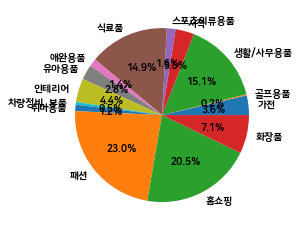

In [55]:
#여자들이 많이 사는 물품
ratio = list(A.loc['F',:]['건수합계'])
labels = list(A.loc['F',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

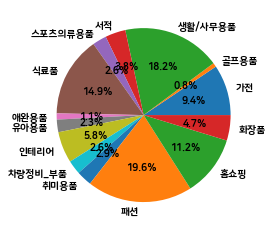

In [56]:
#남자들이 많이 사는 물품
ratio = list(A.loc['M',:]['건수합계'])
labels = list(A.loc['M',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 라벨인코딩

In [57]:
list(set(df['TAG'])) , list(set(df['시간대'])) , list(set(df['연령대']))

(['화장품',
  '인테리어',
  '차량정비_부품',
  '스포츠의류용품',
  '취미용품',
  '서적',
  '생활/사무용품',
  '골프용품',
  '가전',
  '식료품',
  '패션',
  '애완용품',
  '홈쇼핑',
  '유아용품'],
 ['E.18-22시', 'C.10-14시', 'D.14-18시', 'A.02-06시', 'B.06-10시', 'F.22-02시'],
 ['B.3O대', 'E.60대이상', 'C.4O대', 'A.2O대', 'D.5O대'])

In [58]:
encoder=LabelEncoder()
df['TAG'].unique()
encoder.fit(df['TAG'].unique())
target=encoder.transform(df['TAG'])

df['TAG']= target
df['TAG']


0         7
1         2
2         1
3        13
4         8
         ..
21552    11
21553     1
21554     4
21555     8
21556     7
Name: TAG, Length: 21557, dtype: int32

In [59]:
encoder.classes_

array(['가전', '골프용품', '생활/사무용품', '서적', '스포츠의류용품', '식료품', '애완용품', '유아용품',
       '인테리어', '차량정비_부품', '취미용품', '패션', '홈쇼핑', '화장품'], dtype=object)

In [60]:
encoder2=LabelEncoder()
df['연령대'].unique()
encoder2.fit(df['연령대'].unique())
target=encoder2.transform(df['연령대'])

df['연령대']= target
df['연령대']

0        0
1        2
2        1
3        2
4        3
        ..
21552    2
21553    2
21554    1
21555    4
21556    2
Name: 연령대, Length: 21557, dtype: int32

In [61]:
encoder2.classes_

array(['A.2O대', 'B.3O대', 'C.4O대', 'D.5O대', 'E.60대이상'], dtype=object)

In [27]:
df['시간대'].unique()

array(['B.06-10시', 'D.14-18시', 'F.22-02시', 'C.10-14시', 'A.02-06시',
       'E.18-22시'], dtype=object)

In [28]:
encoder3 = LabelEncoder()
df['시간대'].unique()
encoder3.fit(df['시간대'].unique())
target=encoder3.transform(df['시간대'])

df['시간대']= target
df['시간대']

0        1
1        3
2        5
3        3
4        2
        ..
21552    5
21553    3
21554    4
21555    2
21556    2
Name: 시간대, Length: 21557, dtype: int32

In [29]:
encoder3.classes_

array(['A.02-06시', 'B.06-10시', 'C.10-14시', 'D.14-18시', 'E.18-22시',
       'F.22-02시'], dtype=object)

In [30]:
encoder4 = LabelEncoder()
df['평일휴일'].unique()
encoder4.fit(df['평일휴일'].unique())
target=encoder4.transform(df['평일휴일'])

df['평일휴일']= target
df['평일휴일']

0        0
1        0
2        1
3        1
4        0
        ..
21552    0
21553    0
21554    0
21555    0
21556    0
Name: 평일휴일, Length: 21557, dtype: int32

In [31]:
encoder4.classes_

array(['평일', '휴일'], dtype=object)

In [32]:
encoder5 = LabelEncoder()
df['성별'].unique()
encoder5.fit(df['성별'].unique())
target=encoder5.transform(df['성별'])

df['성별']= target
df['성별']

0        0
1        1
2        1
3        0
4        0
        ..
21552    1
21553    0
21554    1
21555    0
21556    1
Name: 성별, Length: 21557, dtype: int32

In [33]:
encoder5.classes_

array(['F', 'M'], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21557 entries, 0 to 21556
Data columns (total 8 columns):
CRI_YM    21557 non-null int64
TAG       21557 non-null int32
평일휴일      21557 non-null int32
요일        21557 non-null object
시간대       21557 non-null int32
성별        21557 non-null int32
연령대       21557 non-null int32
건수합계      21557 non-null int64
dtypes: int32(5), int64(2), object(1)
memory usage: 926.4+ KB


In [35]:
df.drop(columns=["CRI_YM","요일"], inplace=True)

In [36]:
df

,TAG,평일휴일,시간대,성별,연령대,건수합계
0,7,0,1,0,0,291
1,2,0,3,1,2,6225
2,1,1,5,1,1,51
3,13,1,3,0,2,3564
4,8,0,2,0,3,1101
...,...,...,...,...,...,...
21552,11,0,5,1,2,2470
21553,1,0,3,0,2,107
21554,4,0,4,1,1,603
21555,8,0,2,0,4,415


In [37]:
df.corr()

,TAG,평일휴일,시간대,성별,연령대,건수합계
TAG,1.000000,0.005556,-0.009112,-0.001212,-0.001359,0.130328
평일휴일,0.005556,1.000000,0.006043,0.000987,-0.004303,-0.103840
시간대,-0.009112,0.006043,1.000000,-0.000964,0.006888,0.154335
성별,-0.001212,0.000987,-0.000964,1.000000,0.001361,-0.168243
연령대,-0.001359,-0.004303,0.006888,0.001361,1.000000,-0.092038
건수합계,0.130328,-0.103840,0.154335,-0.168243,-0.092038,1.000000


In [38]:
df.iloc[:,:-2],

(       TAG  평일휴일  시간대  성별
 0        7     0    1   0
 1        2     0    3   1
 2        1     1    5   1
 3       13     1    3   0
 4        8     0    2   0
 ...    ...   ...  ...  ..
 21552   11     0    5   1
 21553    1     0    3   0
 21554    4     0    4   1
 21555    8     0    2   0
 21556    7     0    2   1
 
 [21557 rows x 4 columns],)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=3)

In [40]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, max_features = 2, random_state=100).fit(X_train, y_train)

In [41]:
svm=SVC(C=0.1, gamma=0.04, random_state=35, probability=True, kernel='rbf').fit(X_train, y_train)

In [42]:
lr = LogisticRegression().fit(X_train, y_train)

In [43]:
dt_p = dt.predict(X_test)
svm_p=svm.predict(X_test)
lr_p=lr.predict(X_test)

In [44]:
hard_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='hard'
).fit(X_train, y_train)

hard_voting_predicted = hard_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.13845083487940632

In [45]:
soft_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='soft'
).fit(X_train, y_train)

soft_voting_predicted = soft_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.13845083487940632

In [46]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
).fit(X_train, y_train)

In [47]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.2036178107606679

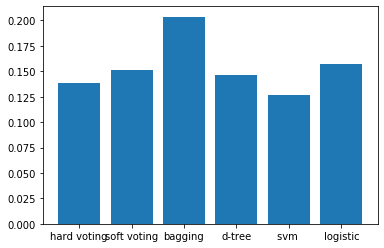

In [48]:
x = np.arange(6)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, dt_p),
                    accuracy_score(y_test, svm_p),
                    accuracy_score(y_test, lr_p)


            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging','d-tree' ,'svm ','logistic']);

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ImportError: cannot import name 'HistGradientBoostingClassifier' from 'sklearn.ensemble' (C:\Users\hi\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
gbc=GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
hist=HistGradientBoostingClassifier(random_state=42).fit(X_train, y_train)
xgb=XGBClassifier(random_state=42,).fit(X_train, y_train)
lgbm=LGBMClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
gbc_p = gbc.predict(X_test)
hist_p = hist.predict(X_test)
xgb_p = xgb.predict(X_test)
lgbm_p = lgbm.predict(X_test)

In [ ]:
print("[accuarcy]")
print("gbc: ",accuracy_score(y_test, gbc_p))
print("svm   : ",accuracy_score(y_test,hist_p))
print("xgb   : ",accuracy_score(y_test, xgb_p))
print("lgbm   : ",accuracy_score(y_test, lgbm_p))